# 6 Phase Plane
---

*Overview*

- [6.0 Introduction](#6.0-Introduction)
- [6.1 Phase Portraits](#6.1 Phase-Portraits)
     - [Numerical Computaion of Phase Portraits](#Numerical-Computaion-of-Phase-Portraits)

---

In [17]:
import matplotlib.pyplot as plt
import numpy as np

c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

"""
figname = ''
plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)
"""

"""
$$\begin{align*}
& \quad\quad (5.)
\end{align*}$$
"""

'\n$$\x08egin{align*}\n& \\quad\\quad (5.)\n\\end{align*}$$\n'

## 6.0 Introduction
---

## 6.1 Phase Portraits
---

$$\begin{cases}
\dot{x}_1 = f_1 (x_1, x_2) \\
\dot{x}_2 = f_2 (x_1, x_2)
\end{cases}$$

$$\mathbf{\dot{x}} = \mathbf{f}( \mathbf{x} )$$

- **fixed points**
- **closed orbits**



### Numerical Computaion of Phase Portraits

Runge-Kutta method

$$\mathbf{x}_{n+1} = \mathbf{x}_n + \frac{1}{6} (\mathbf{k}_1 + 2\mathbf{k}_2 + 2\mathbf{k}_3 + \mathbf{k}_4)$$


$$\begin{align*}
\mathbf{k}_1 &= \mathbf{f}(\mathbf{x}_n)  \Delta t \\
\mathbf{k}_2 &= \mathbf{f}(\mathbf{x}_n + \frac{1}{2}\mathbf{k}_1)  \Delta t \\
\mathbf{k}_3 &= \mathbf{f}(\mathbf{x}_n + \frac{1}{2}\mathbf{k}_2)  \Delta t \\
\mathbf{k}_4 &= \mathbf{f}(\mathbf{x}_n + \mathbf{k}_3)  \Delta t
\end{align*}$$

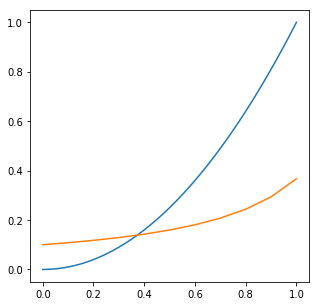

[ 0.1         0.10816369  0.11773072  0.12908734  0.14277264  0.15956098
  0.18060296  0.20767941  0.24368753  0.29364434  0.36696431]


In [11]:
def f(x):
    y = x**2
    return y

def k_1(xi, dt):
    k = f(xi) * dt
    return k

def k_2(xi, dt):
    k = f(xi + k_1(xi, dt)/2) * dt
    return k

def k_3(xi, dt):
    k = f(xi + k_2(xi, dt)/2) * dt
    return k

def k_4(xi, dt):
    k = f(xi + k_3(xi, dt)) * dt
    return k

def rk(x0, dt, n):
    x = np.array([x0])
    
    for i in range(n):
        xi0 = x[i]
        xi1 = xi0 + (k_1(xi0, dt) + k_2(xi0, dt) + k_3(xi0, dt) + k_4(xi0, dt))
        
        x = np.append(x, np.array([xi1]))
    return x

x = np.linspace(0, 1, 100)

x_rk = rk(.1, .2, 10)

plt.figure(figsize=(5, 5))

plt.plot(x, f(x))

plt.plot(np.linspace(0, 1, 11), x_rk)

plt.show()

print(x_rk)

### Example 6.1.1

Consider the system 
$$\begin{align*}
\dot{x} &= x+ e^{-y}\\
\dot{y} &= -y
\end{align*}$$

*Solution*:

$\dot{x} = 0, \dot{y} = 0$

$(x^*, y^*)=(-1, 0)$

to determine stability

$y(t) \rightarrow 0$, as $t \rightarrow \infty$ &because; $y(t) = y_0 e^{-t}$

$e^{-y} \rightarrow 1$, $\dot{x} \approx x + 1$

**nullclines**
- $\dot{x} = 0$ / $\dot{y} = 0$

where $\dot{y} = 0$, 
$y = 0$
$$

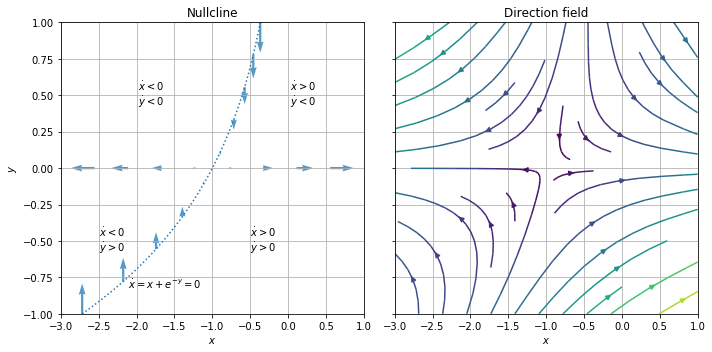

In [27]:
def x_dot(x, y):
    x_ = x + np.exp(-y)
    return x_

def y_dot(x, y):
    y_ = -y
    return y_

def speed(x, y):
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s

def nullcline_y(x, y):
    x_ = x + 1
    return x_

def nullcline_x(y):
    x = - np.exp(-y)
    y_ = -y
    return x, y_

xlim = np.array([-3, 1])
ylim = np.array([-1, 1])

fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 5))
# plt.figure(figsize=(10, 10))
figname = '6_1_3'


x, y = np.linspace(xlim[0], xlim[1], 10), np.linspace(ylim[0], ylim[1], 10)
x, y = np.meshgrid(x, y)

ax1.streamplot(x, y, x_dot(x, y), y_dot(x, y), density=.5, color=speed(x, y), cmap='viridis')

ax1.set_xlabel(r'$x$')
ax1.grid(True)
ax1.set_title('Direction field')
ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])


# x = np.linspace(xlim[0], xlim[1], 5)
# y = np.linspace(xlim[0], xlim[1], 5)
# x, y = np.meshgrid(x, y)
# ax0.quiver(x, y, x_dot(x, y), y_dot(x, y), color=c[0], alpha=.6)

# y_dot = 0
x = np.linspace(xlim[0], xlim[1], 10)
y = np.repeat(0, 10)
y_dot = np.repeat(0, 10)
x_dot = nullcline_y(x, y)
ax0.quiver(x, y, x_dot, y_dot, color=c[0], alpha=.75)

# x_dot = 0
y = np.linspace(ylim[0], ylim[1], 10)
x, y_dot = nullcline_x(y)
x_dot = np.repeat(0, 10)
ax0.quiver(x, y, x_dot, y_dot, color=c[0], alpha=.75)

y = np.linspace(ylim[0], ylim[1], 100)
x, y_dot = nullcline_x(y)
ax0.plot(x, y, c=c[0], linestyle=l[3])
ax0.text(-np.exp(.75), -.75, r'$\dot{x} = x + e^{-y} = 0$', horizontalalignment='left', verticalalignment='top')

ax0.text((xlim[0]-np.exp(-ylim[0]/2))/2, ylim[0]/2, r'$\dot{x} < 0$' '\n' r'$\dot{y} > 0$', horizontalalignment='center', verticalalignment='center')
ax0.text((xlim[1]-np.exp(-ylim[0]/2))/2, ylim[0]/2, r'$\dot{x} > 0$' '\n' r'$\dot{y} > 0$', horizontalalignment='center', verticalalignment='center')
ax0.text((xlim[1]-np.exp(-ylim[1]/2))/2, ylim[1]/2, r'$\dot{x} > 0$' '\n' r'$\dot{y} < 0$', horizontalalignment='center', verticalalignment='center')
ax0.text((xlim[0]-np.exp(-ylim[1]/2))/2, ylim[1]/2, r'$\dot{x} < 0$' '\n' r'$\dot{y} < 0$', horizontalalignment='center', verticalalignment='center')


ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
ax0.grid(True)
ax0.set_title('Nullcline')
ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])


plt.tight_layout()

plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

## 6.2 Exsitence, Uniquness, and Topological Consequences
---

---

*Overview*

- [6.0 Introduction](#6.0-Introduction)
- [6.1 Phase Portraits](#6.1 Phase-Portraits)
     - [Numerical Computaion of Phase Portraits](#Numerical-Computaion-of-Phase-Portraits)
     - [Example 6.1.1](#Example-6.1.1)
- [6.2 Exsitence, Uniquness, and Topological Consequences](#6.2-Exsitence,-Uniquness,-and-Topological-Consequences)